In [26]:
import os
from PIL import Image
import pandas as pd
from pandas import read_csv
import numpy as np

img_folder = "../Yoio_Park_Proof"
target_size = (512, 512)
label_data = read_csv("../model_julius/all_balanced_labels.csv", sep=";")

# Function to load and resize an image
def load_image(img_path, target_size):
    with Image.open(img_path) as img:
        img = img.resize(target_size)
        img = img.convert('RGB')  # Ensure image is in RGB format
        return np.array(img)

# Read images and their corresponding labels
image_data = []
image_labels = []

for idx, row in label_data.iterrows():
    img_name = row[0]
    img_path = os.path.join(img_folder, img_name)
    
    if os.path.exists(img_path):
        img_array = load_image(img_path, target_size)
        image_data.append(img_array)
        image_labels.append(row[1:9])  # Assuming labels are in columns after 'Image'
        print(f"Loaded image {img_name} with label {row[1:9]}", end='\r')
    else:
        print(f"Warning: Image {img_name} not found in folder {img_folder}")



C:\Users\juliu\AppData\Local\Temp\ipykernel_4288\465066660.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_name = row[0]


Loaded image 1591711002d50221be0eb5f5fa95f3c6500f250b40d0d2e0.jpg with label Rule1    0
Rule2    0
Rule3    0
Rule4    0
Rule5    0
Rule6    0
Rule7    0
Rule8    0
Loaded image 1586942444326eb524310033a85f8de3b3d970493367fdd6.jpg with label Rule1    0
Rule2    0
Rule3    0
Rule4    0
Rule5    0
Rule6    0
Rule7    0
Rule8    0
Loaded image 1596232927b2180f32eec5dcabb6a5b1e593d752b133cbd1.jpg with label Rule1    0
Rule2    0
Rule3    0
Rule4    0
Rule5    0
Rule6    0
Rule7    0
Rule8    0
Loaded image 16103675233938b707627c060eea02d6128ac7f242f5345e.jpg with label Rule1    0
Rule2    0
Rule3    0
Rule4    0
Rule5    0
Rule6    0
Rule7    0
Rule8    0
Loaded image 1597220176525a79aa8f99a3898a461a47aed3d92e9baa72.jpg with label Rule1    0
Rule2    0
Rule3    0
Rule4    0
Rule5    0
Rule6    0
Rule7    0
Rule8    0
Loaded image 1609625914460b45e8af8b0ec8cd6fa58283c822b99b2c82.jpg with label Rule1    0
Rule2    0
Rule3    0
Rule4    0
Rule5    0
Rule6    0
Rule7    0
Rule8    0
Loaded ima

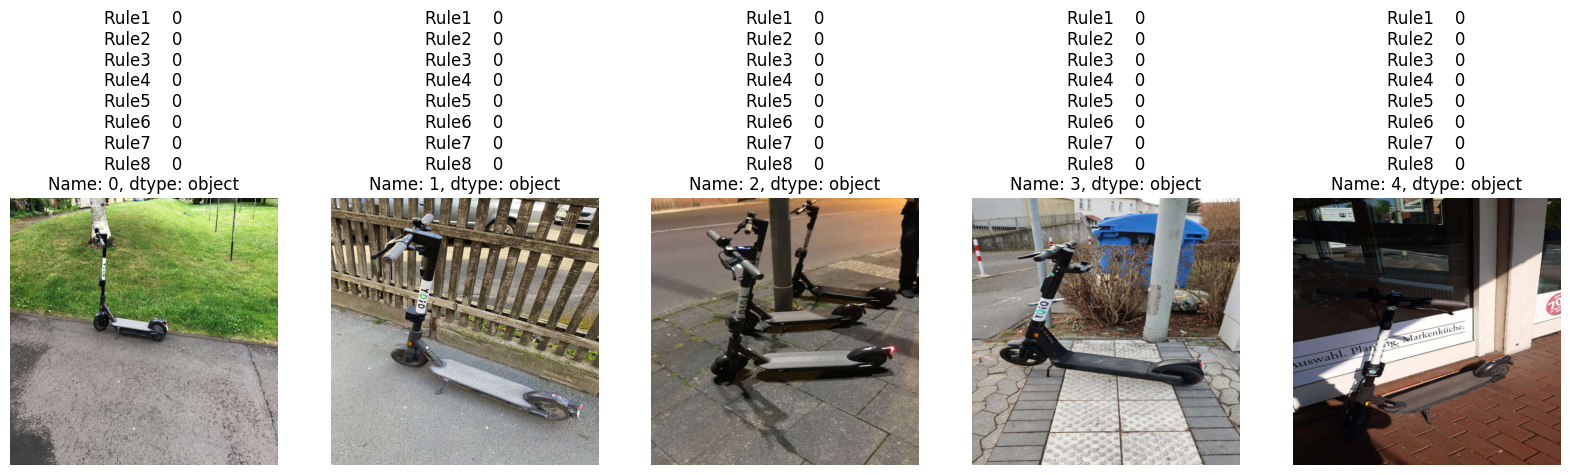

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(image_data[i])
    axes[i].set_title(image_labels[i])
    axes[i].axis('off')
plt.show()

In [62]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [65]:
import pickle

with open('../model_julius/all_test_img.pickle', 'wb') as f:
    pickle.dump((X_test, y_test), f)

In [66]:
#generate augmented images
image_num = 2000 - len(X_train)
augmented_images = []
augmented_labels = []
target_size = (512, 512, 3)
print("Generating ", image_num, " augmented images...")

generated_count = 0

for batch in datagen.flow(X_train, y_train, batch_size=1):
  augmented_images.append(batch[0])
  augmented_labels.append(batch[1])
  generated_count += batch[0].shape[0]
  print("Generated ", generated_count, " augmented images", end='\r')
  if generated_count >= image_num:
    print("Generating done, generated", image_num, " augmented images")
    break

Generating  836  augmented images...
Generating done, generated 836  augmented images


In [67]:
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

augmented_images.shape, augmented_labels.shape, X_train.shape, y_train.shape


((836, 1, 512, 512, 3), (836, 1, 8), (1164, 512, 512, 3), (1164, 8))

In [68]:
augmented_images = augmented_images.reshape(augmented_images.shape[0], 512, 512, 3)
augmented_labels = augmented_labels.reshape(augmented_labels.shape[0], 8)

augmented_labels.shape, augmented_images.shape

((836, 8), (836, 512, 512, 3))

In [72]:
all_augmented_images = np.concatenate((X_train, augmented_images))
all_augmented_labels = np.concatenate((y_train, augmented_labels))

In [73]:
print(all_augmented_images.shape)
print(all_augmented_labels.shape)

(2000, 512, 512, 3)
(2000, 8)


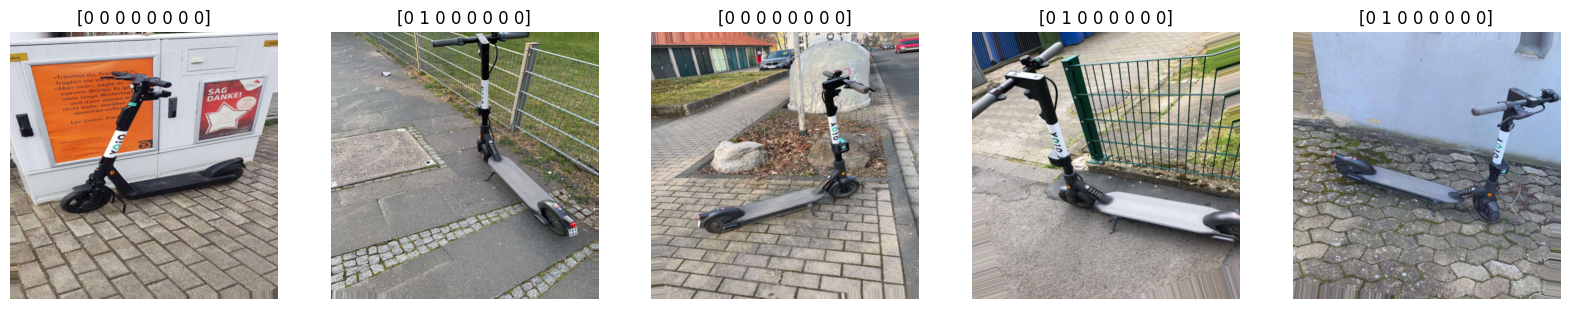

In [74]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].imshow(augmented_images[i].astype('uint8'))
    axes[i].set_title(augmented_labels[i])
    axes[i].axis('off')
plt.show()

In [75]:
import pickle

with open('../model_julius/all_data_useable.pickle', 'wb') as f:
    pickle.dump((all_augmented_images, all_augmented_labels), f)